<a href="https://colab.research.google.com/github/OVP2023/IprojectGeorge/blob/main/pustovalov_lab_2_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

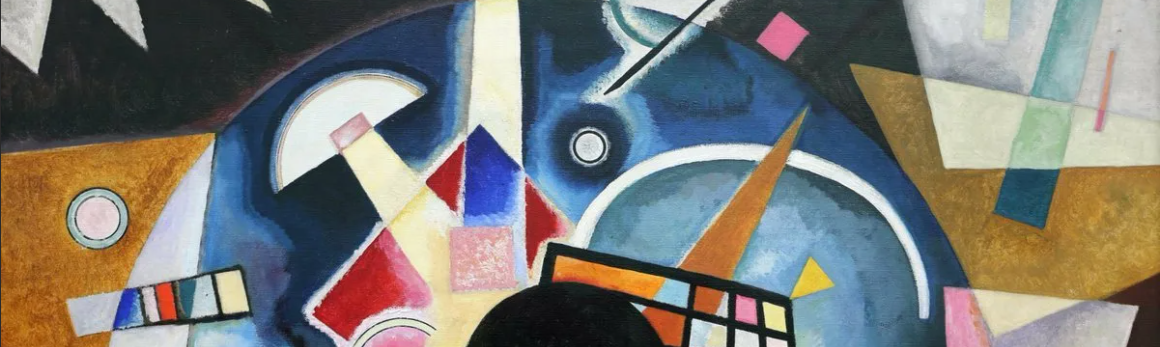

Практическая работа :
Задание:
- изучить алгоритмы кластеризации: DBSCAN и K-means (https://scikit-learn.ru/clustering/)
- изучить их реализацию в библиотеке sklearn (понять, что является аргументам для функций их реализующих)
- далее в  в файле провести кластеризацию трех наборов данных (нужно подобрать агрументы функции, такие, которые позволяют сгруппировать данные наилучшим образом)
- написать свою реализацию одного из алгоритмов (DBSCAN и K-means)
- для KMeans построить зависимость суммы растояний объектов для центров кластеров от количества кластеров



In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import DBSCAN, KMeans

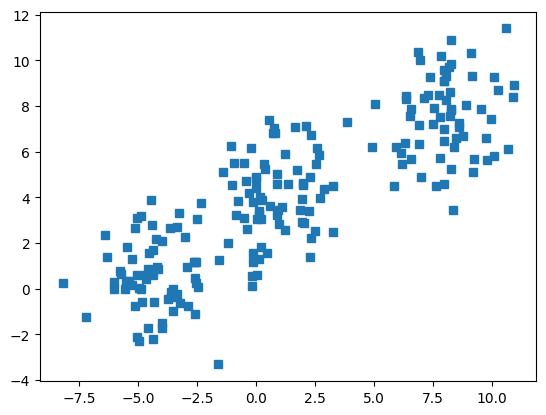

In [ ]:
X, y =make_blobs(n_samples=200,cluster_std=1.5, random_state=3)

plt.plot(X[:,0],X[:,1],'s')

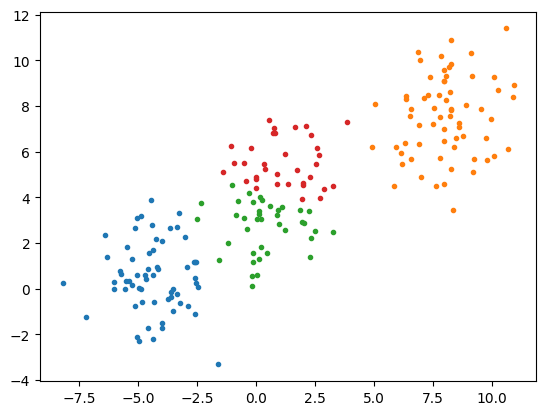

In [ ]:
kmeans = KMeans(n_clusters=10,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0).fit_predict(X) #Т.к. у нас 3 кластера
labels = np.unique(kmeans)
for l in labels:
  plt.plot(X[kmeans==l,0],X[kmeans==l,1],'.')
plt.show()

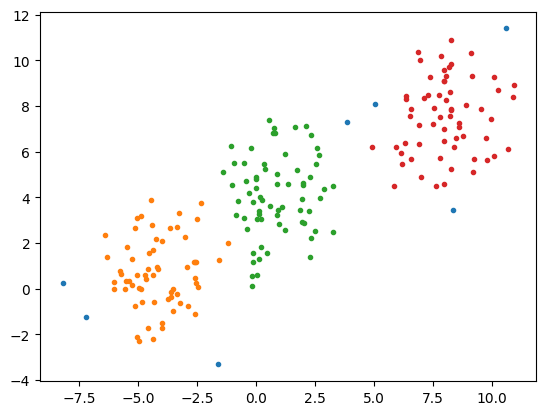

In [ ]:
db = DBSCAN(eps=100, min_samples=40).fit_predict(X)
labels = np.unique(db)
for l in labels:
  plt.plot(X[db==l,0],X[db==l,1],'.')
plt.show()

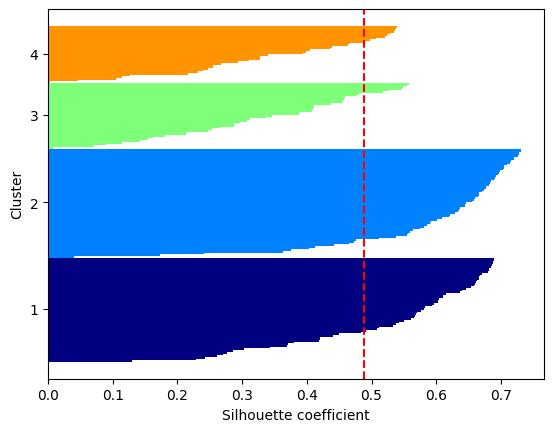

In [ ]:
km = KMeans(n_clusters=10,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
# km = DBSCAN(eps=1.2, min_samples=5)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km)
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

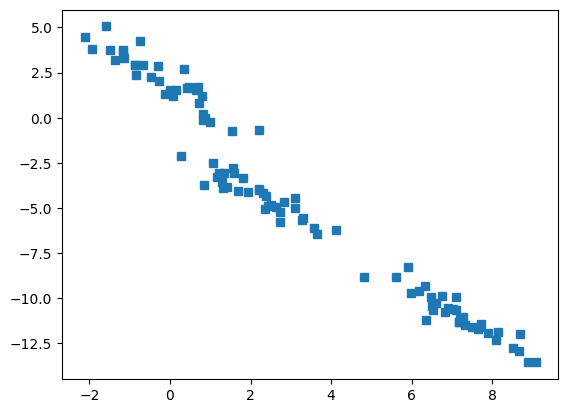

In [ ]:
X, y =make_blobs(n_samples=100,cluster_std=1.5, random_state=10)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)
plt.plot(X[:,0],X[:,1],'s')

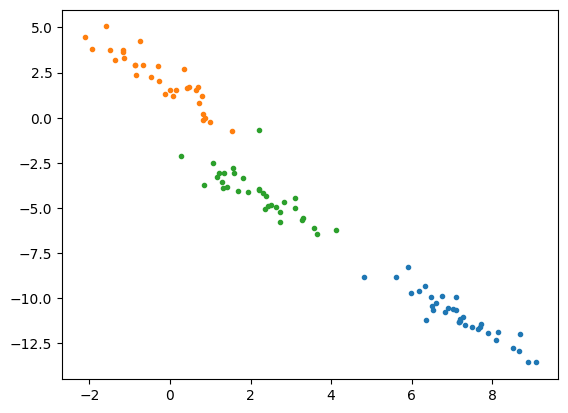

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=1).fit_predict(X)
labels = np.unique(kmeans)
for l in labels:
  plt.plot(X[kmeans==l,0],X[kmeans==l,1],'.')
plt.show()

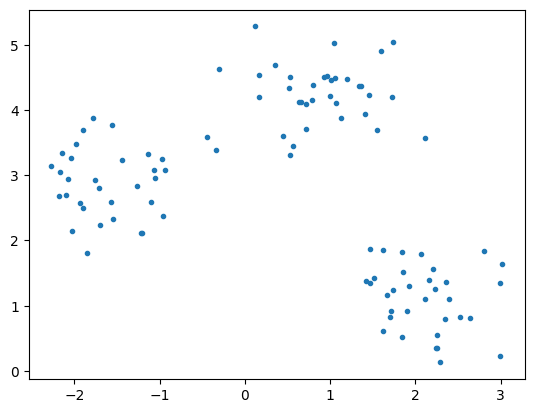

In [ ]:
db = DBSCAN(eps=10., min_samples=30).fit_predict(X)
labels = np.unique(db)
for l in labels:
  plt.plot(X[db==l,0],X[db==l,1],'.')
plt.show()


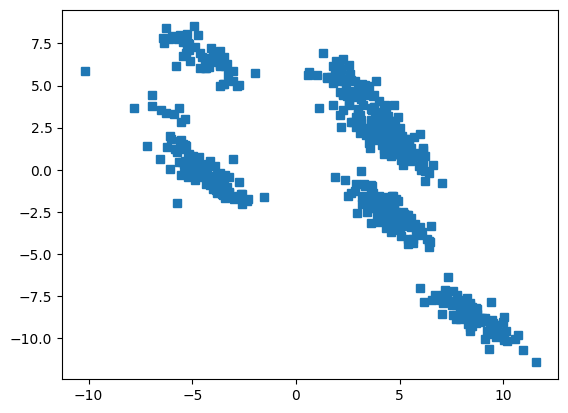

In [ ]:
X, y =make_blobs(n_samples=[100, 10,60,100, 50,100,150], cluster_std=1., random_state=100)
transformation = [[0.4, -0.8], [-0.9, 0.4]]
X = np.dot(X, transformation)
plt.plot(X[:,0],X[:,1],'s')

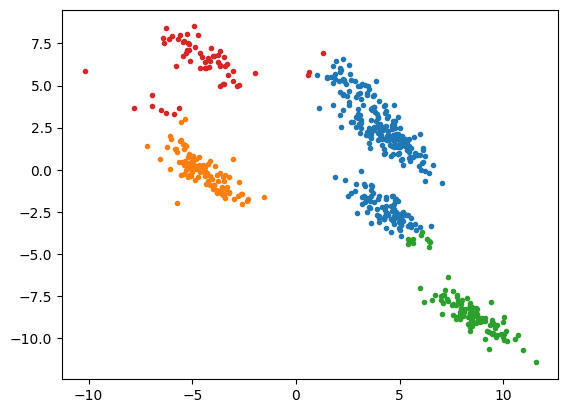

In [ ]:
kmeans = KMeans(n_clusters=40, random_state=5).fit_predict(X)
labels = np.unique(kmeans)
for l in labels:
  plt.plot(X[kmeans==l,0],X[kmeans==l,1],'.')
plt.show()

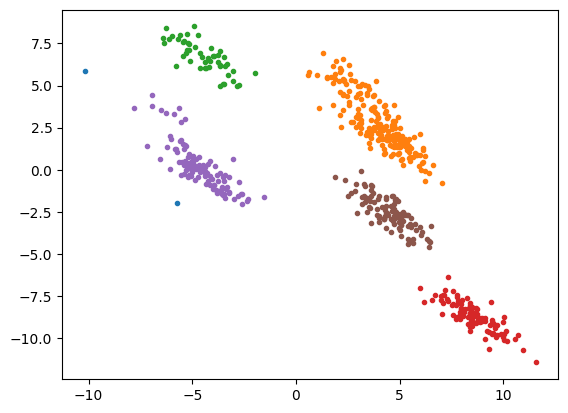

In [ ]:
db = DBSCAN(eps=15.3, min_samples=20).fit_predict(X)
labels = np.unique(db)
for l in labels:
  plt.plot(X[db==l,0],X[db==l,1],'.')
plt.show()

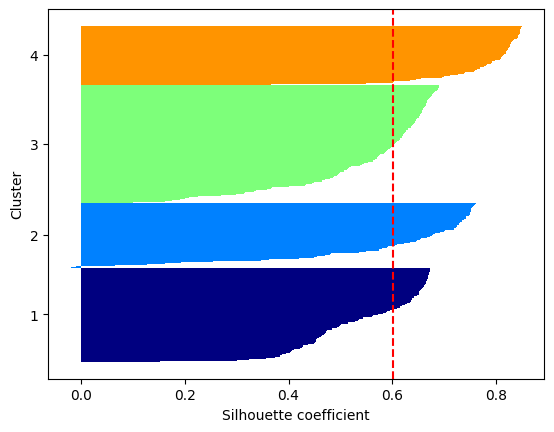

In [ ]:
km = KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
# km = DBSCAN(eps=1.3, min_samples=2)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km)
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

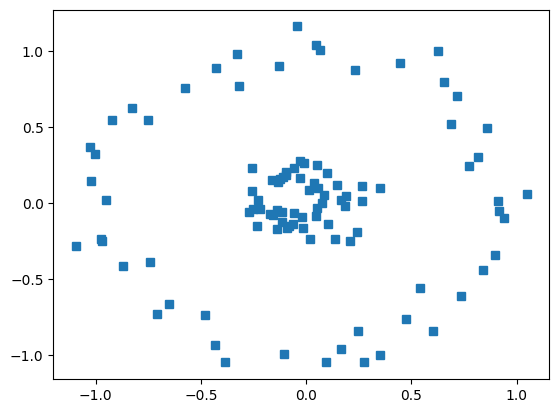

In [ ]:
X,y = make_circles(n_samples=100,noise=0.08,factor=0.2)
plt.plot(X[:,0],X[:,1],'s')

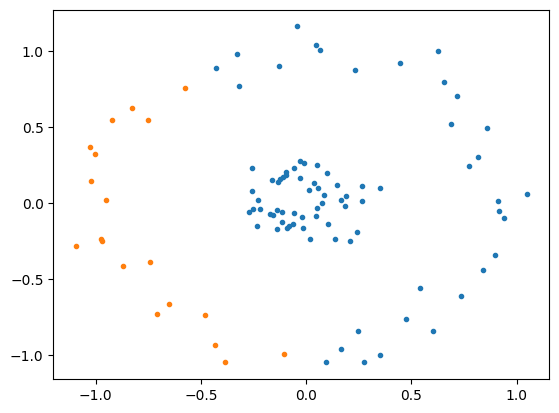

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0).fit_predict(X) # kmeans плохо подходит для круга
labels = np.unique(kmeans)
for l in labels:
  plt.plot(X[kmeans==l,0],X[kmeans==l,1],'.')
plt.show()

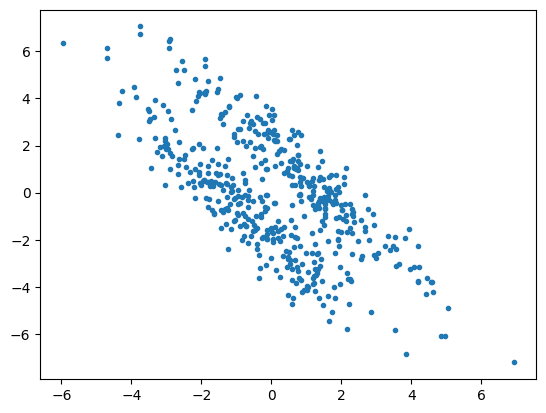

In [ ]:
db = DBSCAN(eps=30, min_samples=3).fit_predict(X)
labels = np.unique(db)
for l in labels:
  plt.plot(X[db==l,0],X[db==l,1],'.')
plt.show()


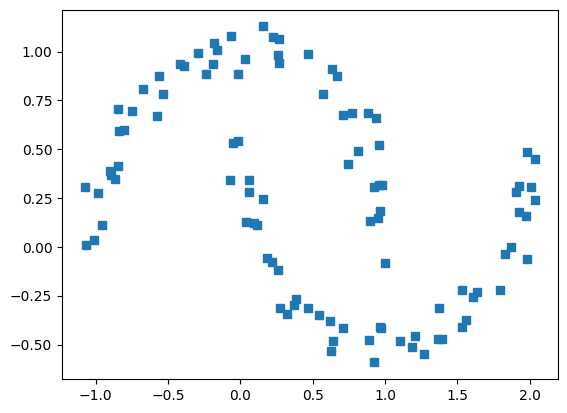

In [ ]:
X,y = make_moons(n_samples=100,noise=0.07)
plt.plot(X[:,0],X[:,1],'s')

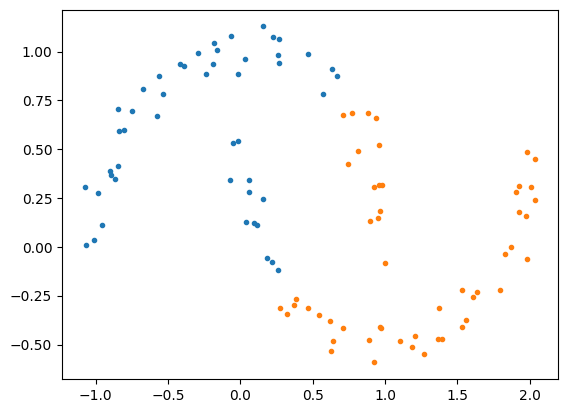

In [ ]:
kmeans = KMeans(n_clusters=20, random_state=0).fit_predict(X) # с полулунами kmeans тоже справляется плохо
labels = np.unique(kmeans)
for l in labels:
  plt.plot(X[kmeans==l,0],X[kmeans==l,1],'.')
plt.show()

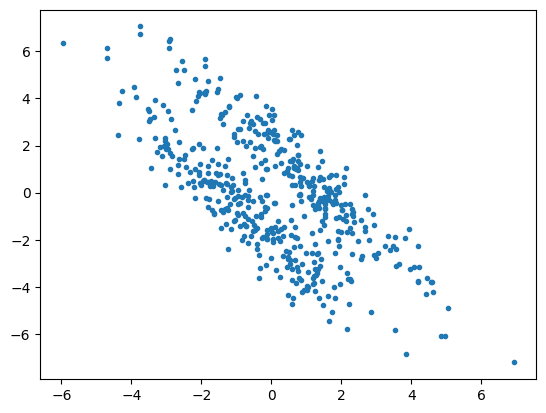

In [ ]:
db = DBSCAN(eps=10.3, min_samples=3).fit_predict(X)
labels = np.unique(db)
for l in labels:
  plt.plot(X[db==l,0],X[db==l,1],'.')
plt.show()

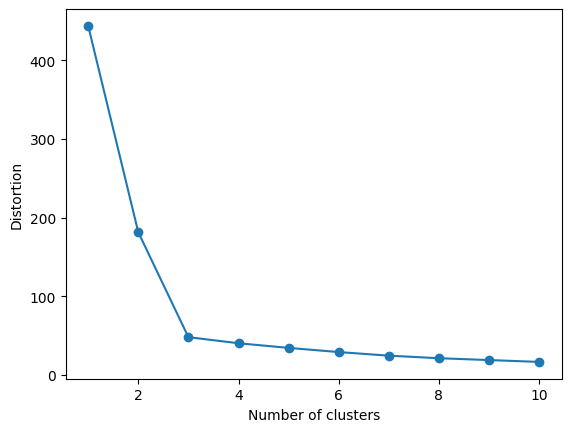

In [ ]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

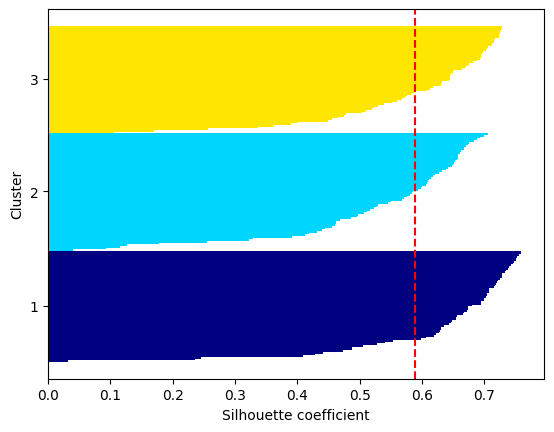

In [ ]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
#km = DBSCAN(eps=0.3, min_samples=5)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km)
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

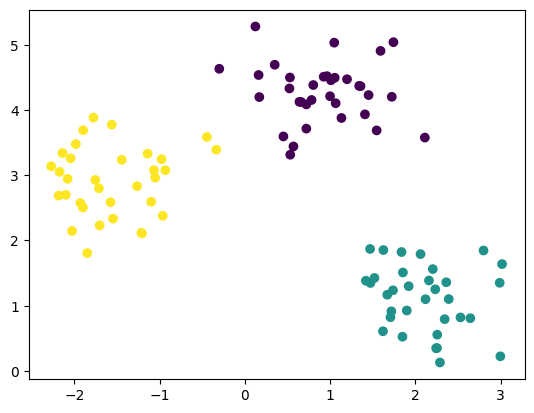

In [31]:
#Загрузим базовый датасет sklearn с 3 выраженными центрами кластеров
X, y = make_blobs(centers=3, cluster_std=0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

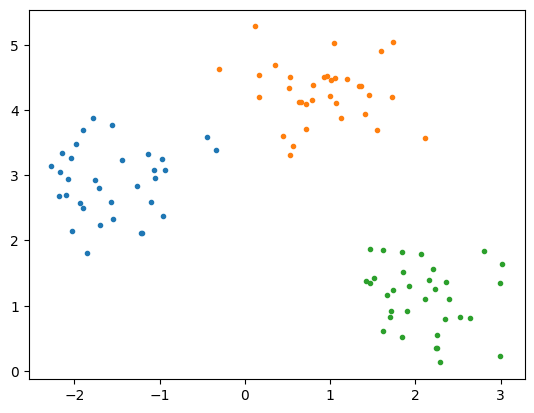

In [ ]:
#Реализуем модель KMeans
kmeans = KMeans(n_clusters=3,init='random').fit_predict(X) #Укажем количество кластеров равным 3 и их первоначальное расположение выбирается из X случайным образом
labels = np.unique(kmeans)
for l in labels:
  plt.plot(X[kmeans==l,0],X[kmeans==l,1],'.')
plt.show()

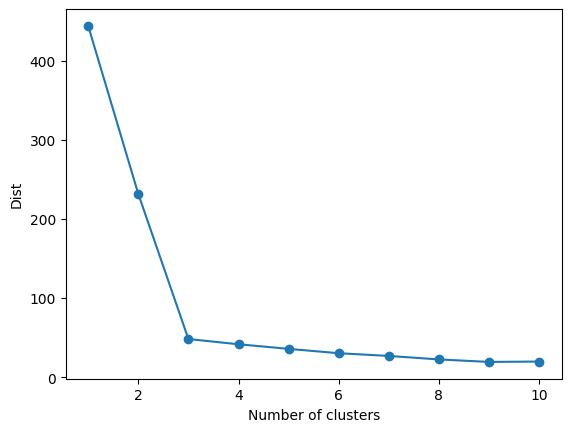

In [ ]:
dist = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='random')
    km.fit(X)
    dist.append(km.inertia_)  #Сумма квадратов расстояний точек до ближайшего центра кластера

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dist')
plt.show()

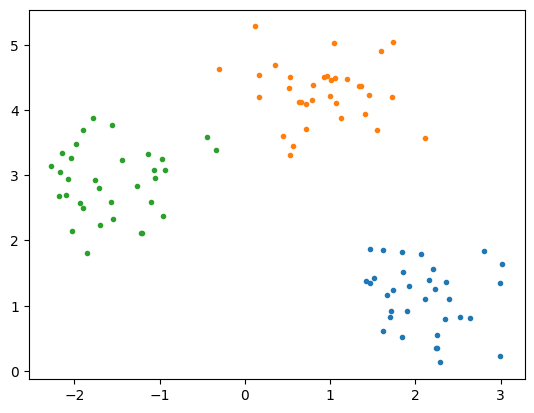

In [32]:
#Реализуем модель DBSCAN
db = DBSCAN(eps=0.7,min_samples=3).fit_predict(X)  #Если расстояние между точками меньше или равно eps, то точки считаются соседями. Второй параметр - мин. количество точек, необходимое для формирования плотной области в радиусе eps. Подберем eps, чтобы было разделение на 3 кластера
labels = np.unique(db)
for l in labels:
  plt.plot(X[db==l,0],X[db==l,1],'.')
plt.show()

In [ ]:
#Реализация алгоритма DBSCAN

In [129]:
from math import hypot

In [144]:
eps=0.5
min_samples=3

base_points=[]  #список основных точек, имещих соседей не меньше min_samples в пределах радиуса eps
border_points=[] #список пограничных точек, имеющих соседей меньше min_samples в пределах радиуса eps
noise_points=[]  #список точек шума

for i in range(X.shape[0]):
    flag_bp=0
    qt=0
    for j in range (X.shape[0]):
        if (i != j):
            dist = hypot(X[i][0] - X[j][0], X[i][1] - X[j][1])  #sqrt(x*x + y*y)
        else:
            dist = 10000

        if  (dist <= eps):
             flag_bp=2
             if (qt==min_samples):
                 flag_bp=1
                 break
             qt=qt+1

    if (flag_bp==1):
        base_points.append([X[i][0],X[i][1]])
    elif (flag_bp==2):
        border_points.append([X[i][0],X[i][1]])
    else:
        noise_points.append([X[i][0],X[i][1]])



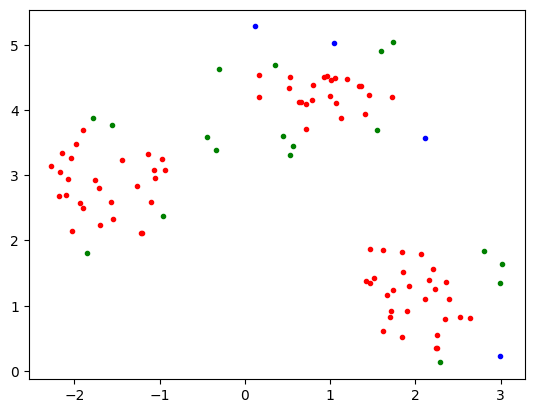

In [145]:
for l in range(len(base_points)):
    plt.plot(base_points[l][0],base_points[l][1],'.r')  #красные основные точки

for l in range(len(border_points)):
    plt.plot(border_points[l][0],border_points[l][1],'.g')   #зеленые пограничные точки

for l in range(len(noise_points)):
    plt.plot(noise_points[l][0],noise_points[l][1],'.b') #синие точки шума

plt.show()

In [ ]:
cluster=1
list_cl=[]

for p in base_points:
    for i in range(X.shape[0]):
        dist = hypot(p[0] - X[j][0], p[1] - X[j][1])  #sqrt(x*x + y*y)

In [ ]:
#Псевдокод
DBSCAN(D, eps, MinPts) {
	C = 0
   for each point P in dataset D {
      if P is visited
         continue next point
      mark P as visited
      NeighborPts = regionQuery(P, eps)
      if sizeof(NeighborPts) < MinPts
         mark P as NOISE
      else {
         C = next cluster
         expandCluster(P, NeighborPts, C, eps, MinPts)
      }
   }
}

expandCluster(P, NeighborPts, C, eps, MinPts) {
   add P to cluster C
   for each point Q in NeighborPts {
      if Q is not visited {
         mark Q as visited
         QNeighborPts = regionQuery(Q, eps)
         if sizeof(QNeighborPts) >= MinPts
            NeighborPts = NeighborPts joined with QNeighborPts
      }
      if Q is not yet member of any cluster
         add Q to cluster C
   }
}